In [1]:
try:
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

from torch import nn
from torchinfo import summary
import matplotlib.pyplot as plt
import sys
from torchinfo import summary

# local imports
from utils import *
from train_model import *
from data import *

import cnn

torch version: 2.0.0+cu117
torchvision version: 0.15.1+cu117


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
image_path = './dataset/'

train_dir = image_path+"train"
test_dir = image_path+"test"

train_dir, test_dir

('./dataset/train', './dataset/test')

In [4]:
walk_through_dir(train_dir)

There are 10 directories and 0 images in './dataset/train'.
There are 0 directories and 800 images in './dataset/train\Atopic Dermatitis'.
There are 0 directories and 800 images in './dataset/train\Basal Cell Carcinoma (BCC)'.
There are 0 directories and 800 images in './dataset/train\Benign Keratosis-like Lesions (BKL)'.
There are 0 directories and 800 images in './dataset/train\Eczema'.
There are 0 directories and 800 images in './dataset/train\Melanocytic Nevi (NV)'.
There are 0 directories and 800 images in './dataset/train\Melanoma'.
There are 0 directories and 800 images in './dataset/train\Psoriasis'.
There are 0 directories and 800 images in './dataset/train\Seborrheic Keratoses'.
There are 0 directories and 800 images in './dataset/train\Tinea Ringworm Candidiasis'.
There are 0 directories and 800 images in './dataset/train\Warts Molluscum and other Viral Infections'.


In [5]:
walk_through_dir(test_dir)

There are 10 directories and 0 images in './dataset/test'.
There are 0 directories and 200 images in './dataset/test\Atopic Dermatitis'.
There are 0 directories and 200 images in './dataset/test\Basal Cell Carcinoma (BCC)'.
There are 0 directories and 200 images in './dataset/test\Benign Keratosis-like Lesions (BKL)'.
There are 0 directories and 200 images in './dataset/test\Eczema'.
There are 0 directories and 200 images in './dataset/test\Melanocytic Nevi (NV)'.
There are 0 directories and 200 images in './dataset/test\Melanoma'.
There are 0 directories and 200 images in './dataset/test\Psoriasis'.
There are 0 directories and 200 images in './dataset/test\Seborrheic Keratoses'.
There are 0 directories and 200 images in './dataset/test\Tinea Ringworm Candidiasis'.
There are 0 directories and 200 images in './dataset/test\Warts Molluscum and other Viral Infections'.


In [6]:
IMG_SIZE = 224

manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])           
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)


In [7]:
BATCH_SIZE = 32

train_dataloader, test_dataloader, class_names = create_dataloader(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x2bc56535400>,
 ['Atopic Dermatitis',
  'Basal Cell Carcinoma (BCC)',
  'Benign Keratosis-like Lesions (BKL)',
  'Eczema',
  'Melanocytic Nevi (NV)',
  'Melanoma',
  'Psoriasis',
  'Seborrheic Keratoses',
  'Tinea Ringworm Candidiasis',
  'Warts Molluscum and other Viral Infections'])

In [8]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(6))

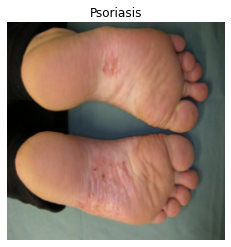

In [9]:
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

In [12]:
cnn_model = cnn.CNN(input_shape=(224,224,3), num_classes=10)
print(cnn_model)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


In [13]:
summary(model=cnn_model, 
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
CNN (CNN)                                [32, 3, 224, 224]    [32, 10]             --                   True
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 32, 224, 224]   896                  True
├─MaxPool2d (pool1)                      [32, 32, 224, 224]   [32, 32, 112, 112]   --                   --
├─Conv2d (conv2)                         [32, 32, 112, 112]   [32, 64, 112, 112]   18,496               True
├─MaxPool2d (pool2)                      [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Conv2d (conv3)                         [32, 64, 56, 56]     [32, 128, 56, 56]    73,856               True
├─MaxPool2d (pool3)                      [32, 128, 56, 56]    [32, 128, 28, 28]    --                   --
├─Linear (fc1)                           [32, 100352]         [32, 512]            51,380,736           True
├─Dropout (dropout) 

In [14]:
optimizer = torch.optim.Adam(params=cnn_model.parameters(), 
                             lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()
set_seed()
results = train(model=cnn_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.1562 | train_acc: 0.1948 | test_loss: 1.9291 | test_acc: 0.2763
Epoch: 2 | train_loss: 1.9273 | train_acc: 0.2742 | test_loss: 1.7793 | test_acc: 0.3765
Epoch: 3 | train_loss: 1.8280 | train_acc: 0.3191 | test_loss: 1.6966 | test_acc: 0.3834
Epoch: 4 | train_loss: 1.7511 | train_acc: 0.3468 | test_loss: 1.6586 | test_acc: 0.3755
Epoch: 5 | train_loss: 1.6964 | train_acc: 0.3679 | test_loss: 1.6085 | test_acc: 0.4013
Epoch: 6 | train_loss: 1.6513 | train_acc: 0.3879 | test_loss: 1.5691 | test_acc: 0.4053
Epoch: 7 | train_loss: 1.6197 | train_acc: 0.3946 | test_loss: 1.5416 | test_acc: 0.4291
Epoch: 8 | train_loss: 1.5852 | train_acc: 0.4104 | test_loss: 1.5118 | test_acc: 0.4390
Epoch: 9 | train_loss: 1.5548 | train_acc: 0.4211 | test_loss: 1.4946 | test_acc: 0.4380
Epoch: 10 | train_loss: 1.5359 | train_acc: 0.4244 | test_loss: 1.4822 | test_acc: 0.4420


In [ ]:
plot_loss_curves(results)
